In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math as m

In [149]:
size=0.175
path = f'rotation/Circle_{size}/circle_periodic_1000_ready_to_play.csv'
df = pd.read_csv(path)


In [150]:
data = np.genfromtxt(path, delimiter=',')

In [151]:
data = data.reshape((1000, 4))

In [152]:
data = np.delete(data, 3, 1)  # remove redundant dimension (0, 0.0333, 0.1194, 1 -> 0, 0.0333, 0.1194)

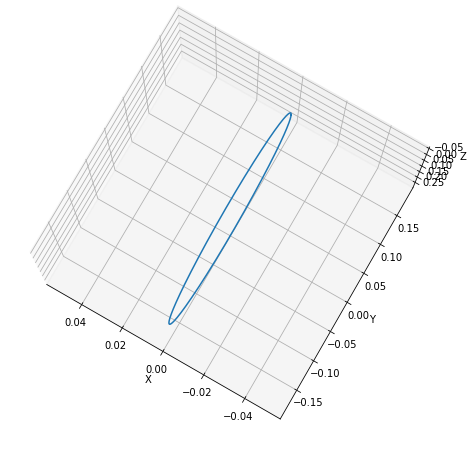

In [153]:
# Plot the given shape
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

ax.plot3D(data[:, 0], data[:, 1], data[:, 2])
ax.view_init(-100, 60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [154]:
# Rotation across z 
def Rz(theta):
    return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                      [ m.sin(theta), m.cos(theta) , 0 ],
                      [ 0           , 0            , 1 ]])

In [155]:
# Function for data rotation 
def rotate_data_across_z(data, theta):
    rotated_data = np.zeros((1000, 3))
    for i in range(data.shape[0]):
        rotated_data[i] = np.dot(Rz(theta), data[i])
    rotated_data[abs(0 - rotated_data) < 0.00000001] = 0 # too small values = 0 
    return rotated_data

In [156]:
# Rotate the shape (theta = angle)
theta = m.pi
a = rotate_data_across_z(data, theta)

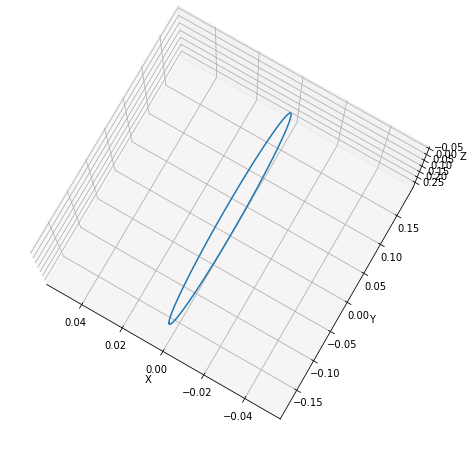

In [157]:
# Plot the rotated shape (can be confusing with small degrees because of the axes scaling)
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

ax.plot3D(a[:, 0], a[:, 1], a[:, 2])
ax.view_init(-100, 60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [158]:
# small example
# rz = Rz(m.pi)
# data_test = data[1]
# np.dot(rz, data_test)

## For loop for 360 shape rotations 

In [159]:
for i in range(360):
    theta = (m.pi / 180) * i
    new_data = rotate_data_across_z(data, theta)
    new_df = pd.DataFrame(new_data, columns=['x', 'y', 'z'])
    new_df.to_csv(f'rotation/Circle_{size}/data360/circle_{size}_{i}_degrees.csv', index=False)